#Importing The Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Load The DataSet

In [3]:
# Load the text files using pandas

train_data = pd.read_csv("/content/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test_data  = pd.read_csv("/content/test_data.txt", delimiter=':::' ,header = None ,engine='python')

test_data_solution  = pd.read_csv("/content/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

####View Train Data

In [4]:
print(train_data.shape)

(3178, 4)


In [5]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


####View Test Data

In [6]:
print(test_data.shape)

(4909, 3)


In [7]:
test_data.head()

,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


###Concat the Data

In [8]:
## We will concat the test and train file

df = pd.concat((train_data ,test_data_solution))
df.columns = ["id" ,"Title","Genre","Description"]
df.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
print(df.shape)

(6380, 4)


# Data Cleaning and Preprocessing

In [10]:
# Checking for Duplicates and Remove them
df.duplicated().sum()

0

In [11]:
df.drop_duplicates(inplace = True)  ## Will drops any duplicates

In [12]:
## Checking for nan values

df.isna().sum()

id             0
Title          0
Genre          0
Description    0
dtype: int64

In [13]:
df.dropna( inplace = True ) ## Will drop any nan containing row if exists

In [11]:
# function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

    # tokenize and convert to list
    tokens = word_tokenize(text)

    ## Lemmatize it
    lemmatizer  = WordNetLemmatizer()

    ## lemmatize each token
    text = [lemmatizer.lemmatize(token) for token in tokens]

    text = [word for word in text if word not in stopword]


    return " ".join(text)

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
# Create list of words in discription column
df["Des_clean"] =  df["Description"].apply(preprocessing)

In [18]:
df.head()

,id,Title,Genre,Description,Des_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...


#Data Visualization

In [19]:
# It will Shows us the label counts
df["Genre"].value_counts()

Genre
 drama           9667
 documentary     9298
 comedy          5233
 short           3641
 horror          1556
 thriller        1140
 action           960
 western          716
 reality-tv       630
 family           566
 adventure        547
 music            530
 romance          468
 sci-fi           463
 adult            428
 animation        384
 crime            327
 sport            294
 talk-show        273
 fantasy          239
 mystery          221
 biography        172
 musical          171
 history          169
 news             142
 game-show        140
 war              104
Name: count, dtype: int64

In [24]:
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Count the frequency of each genre
genre_counts = df["Genre"].value_counts()

# Create a histogram using Plotly Express
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x': 'Genres', 'y': 'Frequency'},
             title='Genre Distribution',
             color=genre_counts.index,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(xaxis_tickangle=-45)


In [25]:
# Calculate the length of movie titles
df['Title Length'] = df['Title'].apply(len)

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(df, x='Title Length', y='Genre', color='Genre',
                 title='Relationship between Title Length and Genre',
                 labels={'Title Length': 'Title Length (Number of Characters)', 'Genre': 'Genres'},
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()

In [26]:
# Count the frequency of each genre
genre_counts = df["Genre"].value_counts()

# Create an interactive pie chart using Plotly Express
fig = px.pie(genre_counts,
             names=genre_counts.index,
             values=genre_counts.values,
             title='Genre Distribution',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Show the  pie chart
fig.show()

## Data Cleaning

In [14]:
# code to drop "Title" and "id"

df = df.drop(columns=['Title', 'id'], axis=1)
df.head()

,Genre,Description,Des_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...


#Model selection

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

###Coverting Genre into Numerical Form

In [16]:
# Convert sentiment Labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])

df['Genre_encoded']

class_names = list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [17]:
df.head()

,Genre,Description,Des_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parent 10yearold...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...,8
4,drama,The film's title refers not only to the un-re...,film title refers unrecovered body ground zero...,8


In [18]:
x = df['Des_clean']
y = df['Genre']

In [20]:
#  splitting df in training and testing data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Count Vectorize Technique

In [21]:
vectorize = CountVectorizer()

x_train1 = vectorize.fit_transform(X_train)
x_test1 = vectorize.transform(X_test)

##Multinomial NB Classifier

In [23]:
mnb = MultinomialNB()
mnb.fit(x_train1, y_train)
# Evaluate the model
train_accuracy = mnb.score(x_train1, y_train)
test_accuracy = mnb.score(x_test1, y_test)
# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
# Make predictions and display classification report
y_pred = mnb.predict(x_test1)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 0.72
Test Accuracy: 0.48
Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00        29
       adult        0.00      0.00      0.00        16
   adventure        1.00      0.06      0.11        17
   animation        0.00      0.00      0.00        17
   biography        0.00      0.00      0.00         8
      comedy        0.59      0.24      0.35       193
       crime        0.00      0.00      0.00         9
 documentary        0.57      0.87      0.69       315
       drama        0.40      0.90      0.55       306
      family        0.00      0.00      0.00        18
     fantasy        0.00      0.00      0.00         3
   game-show        0.00      0.00      0.00         4
     history        0.00      0.00      0.00         6
      horror        0.50      0.06      0.11        51
       music        0.00      0.00      0.00        17
     musical        0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


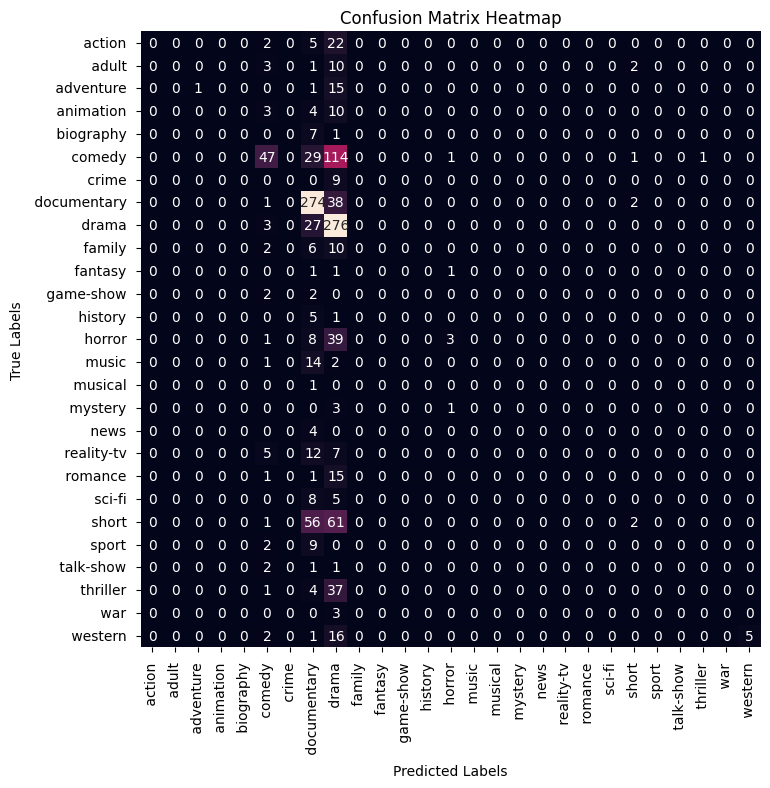

In [26]:
#  Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

###LogisticRegression

In [30]:
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Testing data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9998040752351097
Model Score on Testing data 0.5203761755485894
               precision    recall  f1-score   support

      action        0.14      0.22      0.17        18
       adult        0.06      0.50      0.11         2
   adventure        0.24      0.80      0.36         5
   animation        0.00      0.00      0.00         2
   biography        0.00      0.00      0.00         0
      comedy        0.50      0.53      0.51       180
       crime        0.00      0.00      0.00         0
 documentary        0.78      0.67      0.72       367
       drama        0.73      0.46      0.57       483
      family        0.00      0.00      0.00         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.25      1.00      0.40         1
     history        0.00      0.00      0.00         0
      horror        0.45      0.70      0.55        33
       music        0.41      0.54      0.47        13
     musical        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

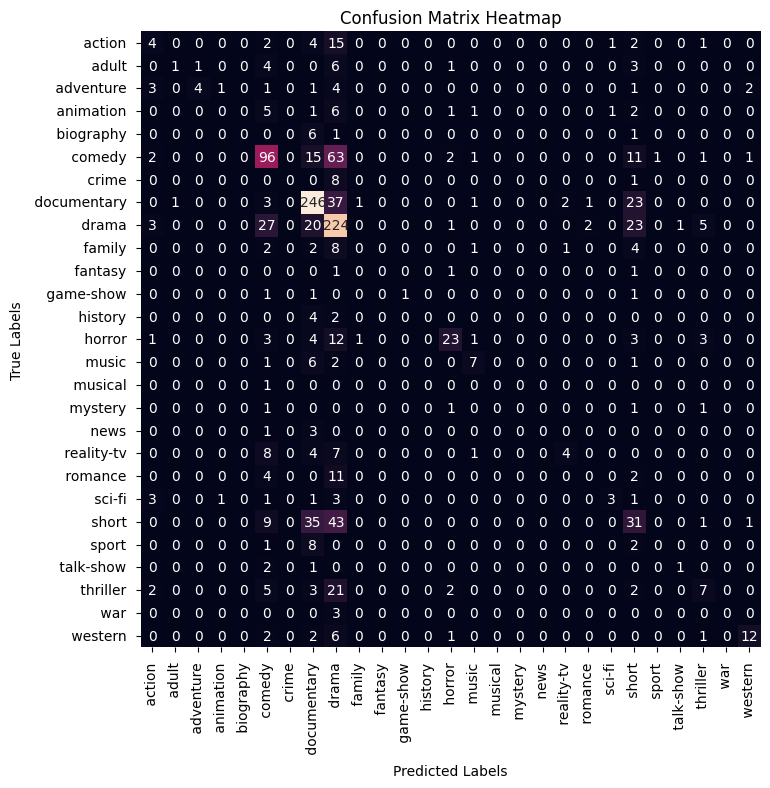

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
xticklabels=class_names, yticklabels=class_names)
plt.xlabel( 'Predicted Labels')
plt.ylabel('True Labels')
plt.title( 'Confusion Matrix Heatmap')
plt.show()

###Support Vector Machine ( SVC )


In [34]:
svm = LinearSVC()
svm.fit(x_train1 ,y_train)
print("Model Score on Training data",svm.score(x_train1 ,y_train))
print("Model Score on Testing data",svm.score(x_test1 ,y_test))
y_pred = svm.predict(x_test1)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9998040752351097
Model Score on Testing data 0.4945141065830721
               precision    recall  f1-score   support

      action        0.21      0.22      0.21        27
       adult        0.12      0.29      0.17         7
   adventure        0.29      0.42      0.34        12
   animation        0.12      0.33      0.17         6
   biography        0.00      0.00      0.00         0
      comedy        0.49      0.52      0.51       182
       crime        0.00      0.00      0.00         1
 documentary        0.71      0.67      0.69       335
       drama        0.66      0.48      0.56       422
      family        0.11      0.25      0.15         8
     fantasy        0.00      0.00      0.00         2
   game-show        0.50      1.00      0.67         2
     history        0.00      0.00      0.00         0
      horror        0.45      0.61      0.52        38
       music        0.41      0.50      0.45        14
     musical        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter 

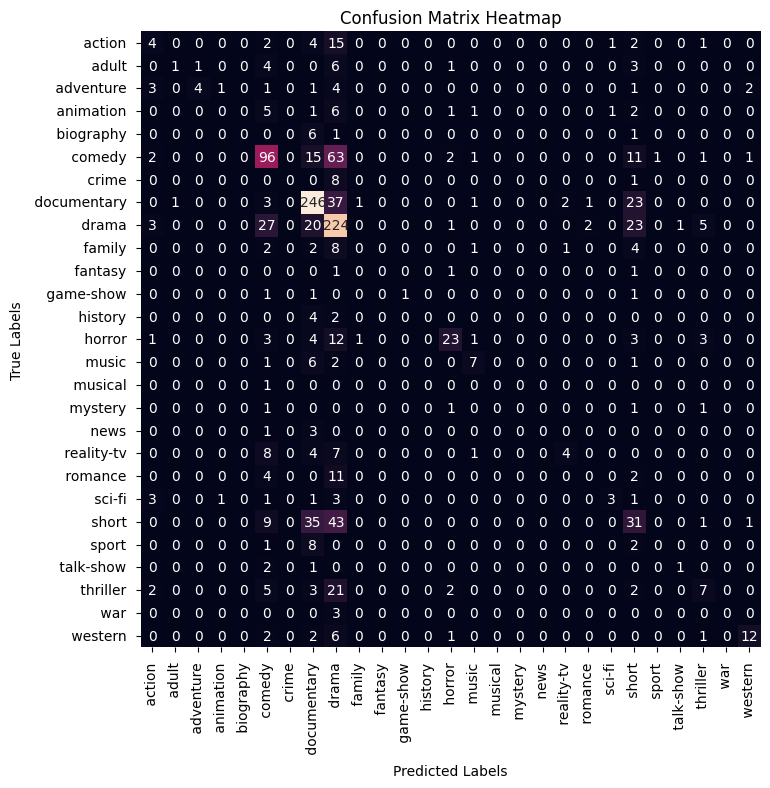

In [36]:
m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title( 'Confusion Matrix Heatmap')
plt.show()

#Training the Model Using TF-IDF Vectorization Technique

In [39]:
## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(X_train)
x_test2 = vectorize.transform(X_test)

In [40]:
x_train2

<5104x34650 sparse matrix of type '<class 'numpy.int64'>'
	with 251271 stored elements in Compressed Sparse Row format>

In [41]:
x_test2

<1276x34650 sparse matrix of type '<class 'numpy.int64'>'
	with 57408 stored elements in Compressed Sparse Row format>

###Multinomial Naive Bayes classifier


In [42]:
mnb = MultinomialNB()
mnb.fit(x_train2 ,y_train)
print("Model Score on Training data",mnb.score(x_train2 ,y_train))
print("Model Score on Testing data",mnb.score(x_test2 ,y_test))
y_pred = mnb.predict(x_test2)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.7153213166144201
Model Score on Testing data 0.47648902821316613
               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.06      1.00      0.11         1
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.24      0.59      0.35        79
       crime        0.00      0.00      0.00         0
 documentary        0.87      0.57      0.69       481
       drama        0.90      0.40      0.55       696
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.06      0.50      0.11         6
       music        0.00      0.00      0.00         0
     musical        0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


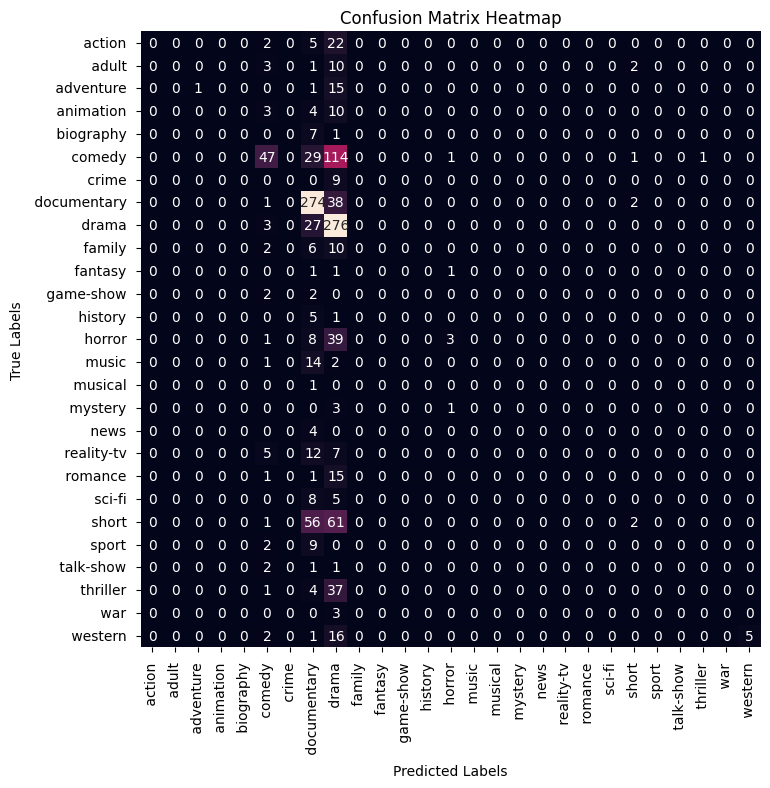

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8)) # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title( 'Confusion Matrix Heatmap')
plt.show()

###LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(x_train2 ,y_train)
print("Model Score on Training data",model.score(x_train2 ,y_train))
print("Model Score on Testing data",model.score(x_test2 ,y_test))
y_pred = model.predict(x_test2)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9998040752351097
Model Score on Testing data 0.5203761755485894
               precision    recall  f1-score   support

      action        0.14      0.22      0.17        18
       adult        0.06      0.50      0.11         2
   adventure        0.24      0.80      0.36         5
   animation        0.00      0.00      0.00         2
   biography        0.00      0.00      0.00         0
      comedy        0.50      0.53      0.51       180
       crime        0.00      0.00      0.00         0
 documentary        0.78      0.67      0.72       367
       drama        0.73      0.46      0.57       483
      family        0.00      0.00      0.00         2
     fantasy        0.00      0.00      0.00         0
   game-show        0.25      1.00      0.40         1
     history        0.00      0.00      0.00         0
      horror        0.45      0.70      0.55        33
       music        0.41      0.54      0.47        13
     musical        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

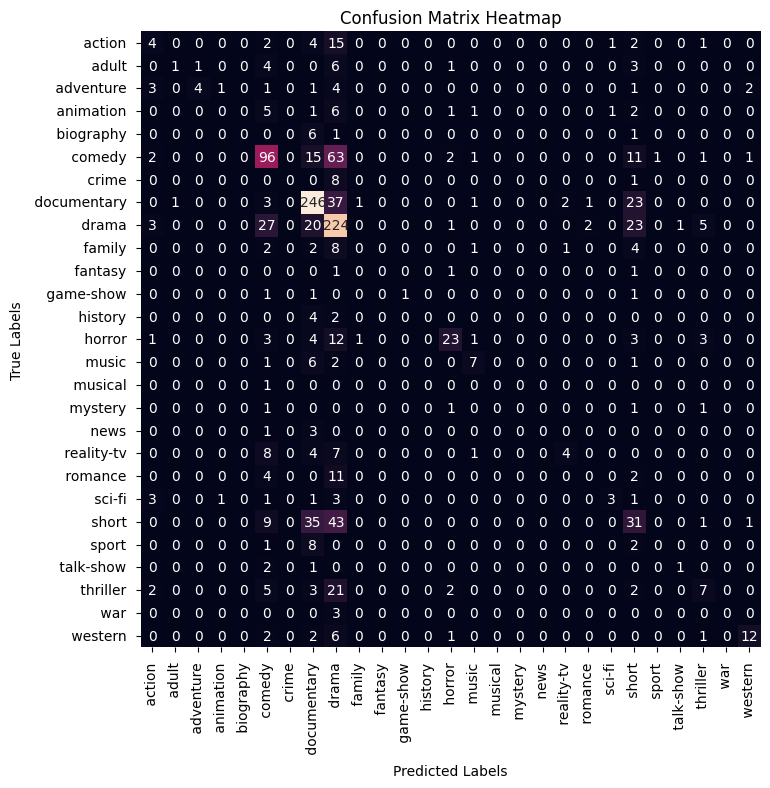

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title( 'Confusion Matrix Heatmap')
plt.show()

###Support Vector Machine ( SVC)

In [47]:
svm = LinearSVC()
svm.fit(x_train2 ,y_train)
print("Model Score on Training data",svm.score(x_train2 ,y_train))
print("Model Score on Testing data",svm.score(x_test2 ,y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9998040752351097
Model Score on Testing data 0.4945141065830721
               precision    recall  f1-score   support

      action        0.21      0.22      0.21        27
       adult        0.12      0.29      0.17         7
   adventure        0.29      0.42      0.34        12
   animation        0.12      0.33      0.17         6
   biography        0.00      0.00      0.00         0
      comedy        0.49      0.52      0.51       182
       crime        0.00      0.00      0.00         1
 documentary        0.71      0.67      0.69       335
       drama        0.66      0.48      0.56       422
      family        0.11      0.25      0.15         8
     fantasy        0.00      0.00      0.00         2
   game-show        0.50      1.00      0.67         2
     history        0.00      0.00      0.00         0
      horror        0.45      0.61      0.52        38
       music        0.41      0.50      0.45        14
     musical        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter 

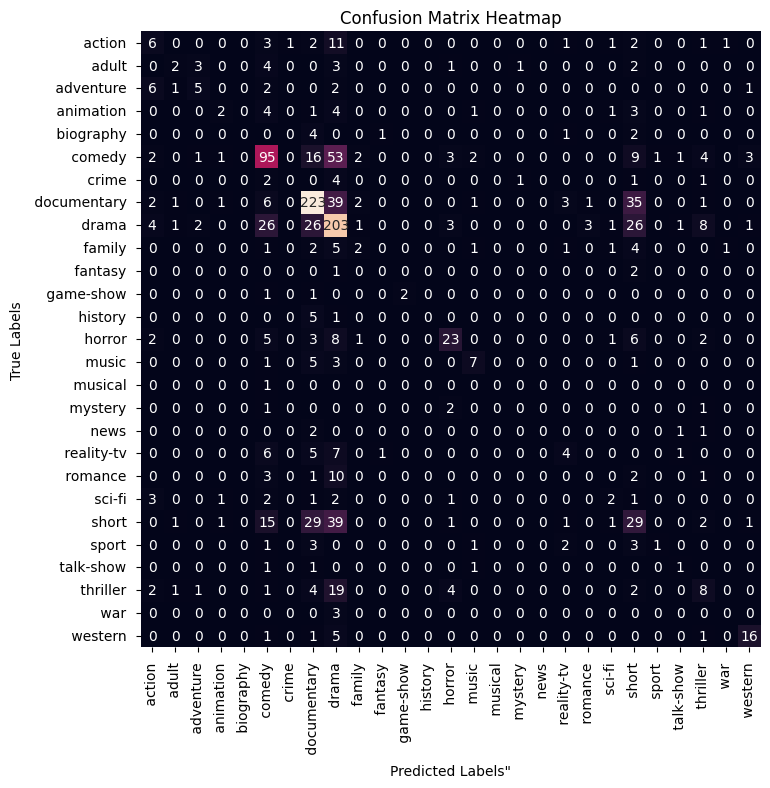

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels"')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Conclusion:

## After evaluation of various models trained using both CountVectorizer and TF-IDF Vectorization techniques, the  **Logistic Regression model** performing best.
